http://nesstar.ess.nsd.uib.no/webview/index.jsp?v=2&submode=abstract&study=http%3A%2F%2F129.177.90.83%3A80%2Fobj%2FfStudy%2FESS6e02.4&mode=documentation&top=yes

https://docs.google.com/presentation/d/1Jr7YXWWu4Wkegx8jBnV6W8j-BTzg1Oypp5b4V0teP3E/edit#slide=id.gbf4aeacc9e_12_5

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

## Importings

In [101]:
DATASET_PATH = '../datasets/'

df = pd.read_sas(DATASET_PATH + '/ess6e02_4.sas7bdat', encoding = 'latin-1')

# df.to_csv(DATASET_PATH + 'ess6e02_4.csv', index=False)

In [21]:
df.shape

(54673, 624)

In [29]:
nunique_cols = df.nunique()
df = df[nunique_cols[nunique_cols!=1].index]

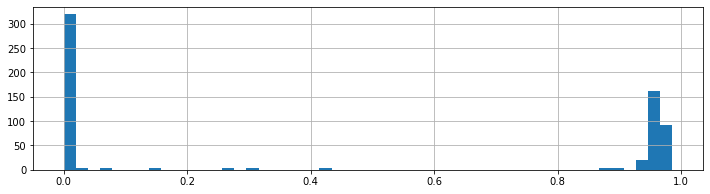

In [33]:
null_cols = df.isna().sum()/df.shape[0]
null_cols.hist(bins=50, figsize=(12, 3));

## Dataprep

### Countries

In [108]:
df['cntry'] = df['cntry'].map({'AL':'Albania','BE':'Belgium','BG':'Bulgaria','CH':'Switzerland','CY':'Cyprus','CZ':'Czechia','DE':'Germany','DK':'Denmark','EE':'Estonia','ES':'Spain','FI':'Finland','FR':'France','GB':'United Kingdom','HU':'Hungary','IE':'Ireland','IL':'Israel','IS':'Iceland','IT':'Italy','LT':'Lithuania','NL':'Netherlands','NO':'Norway','PL':'Poland','PT':'Portugal','RU':'Russian Federation','SE':'Sweden','SI':'Slovenia','SK':'Slovakia','UA':'Ukraine','XK':'Kosovo'})

### Well-being

In [109]:
df['happy'] = df['happy'].map({0:'Extremely unhappy',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'Extremely happy',77:'Refusal',88:'Dont know',99:'No answer'})
df['sclmeet'] = df['sclmeet'].map({1:'Never',2:'Less than once a month',3:'Once a month',4:'Several times a month',5:'Once a week',6:'Several times a week',7:'Every day',77:'Refusal',88:'Dont know',99:'No answer'})
df['inprdsc'] = df['inprdsc'].map({0:'None',1:'1',2:'2',3:'3',4:'44351',5:'44446',6:'10 or more',77:'Refusal',88:'Dont know',99:'No answer'})
df['sclact'] = df['sclact'].map({1:'Much less than most',2:'Less than most',3:'About the same',4:'More than most',5:'Much more than most',7:'Refusal',8:'Dont know',9:'No answer'})
df['crmvct'] = df['crmvct'].map({1:'Much less than most',2:'Less than most',3:'About the same',4:'More than most',5:'Much more than most',7:'Refusal',8:'Dont know',9:'No answer'})
df['aesfdrk'] = df['aesfdrk'].map({1:'Very safe',2:'Safe',3:'Unsafe',4:'Very unsafe',7:'Refusal',8:'Dont know',9:'No answer'})
df['health'] = df['health'].map({1:'Very good',2:'Good',3:'Fair',4:'Bad',5:'Very bad',7:'Refusal',8:'Dont know',9:'No answer'})
df['hlthhmp'] = df['hlthhmp'].map({1:'Yes a lot',2:'Yes to some extent',3:'No',7:'Refusal',8:'Dont know',9:'No answer'})

## EDA

In [41]:
def percentage_nulls(df, col):
    print('Percentage of null:', df[col].isna().sum()/df.shape[0])

In [43]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [125]:
def plot_data(df, col, categorical=True, figsize=(16, 4)):
    plt.figure(figsize=figsize)
    if categorical:
        sns.countplot(x=col, data=df)
    else:
        sns.kdeplot(x=col, data=df)
    plt.show()

In [126]:
def basic_eda(df, col, categorical=True, figsize=(16, 4)):
    # percentage of null 
    percentage_nulls(df, col)
    # distribution of data
    plot_data(df, col, categorical, figsize)

#### country

Percentage of null: 0.0


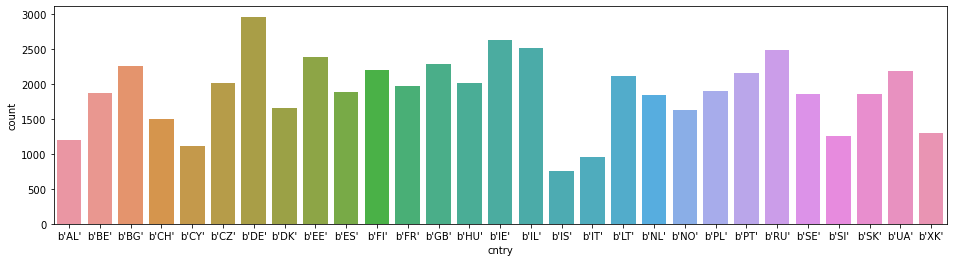

In [75]:
basic_eda(df, 'cntry')

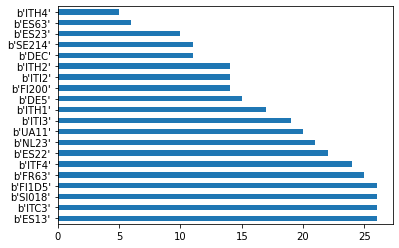

In [122]:
df['region'].value_counts().tail(20).plot.barh();

#### gender

In [123]:
cat_cols = ['gndr', 'hhmmb', 'icpart1', 'rshipa2', 'marsts', 'chldhm', 'domicil', 'edulvlb', 'eduyrs']
num_cols = ['agea']

gndr
Percentage of null: 0.0


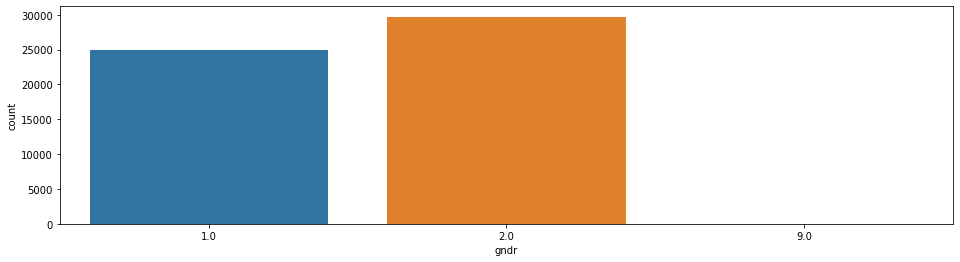

hhmmb
Percentage of null: 0.0


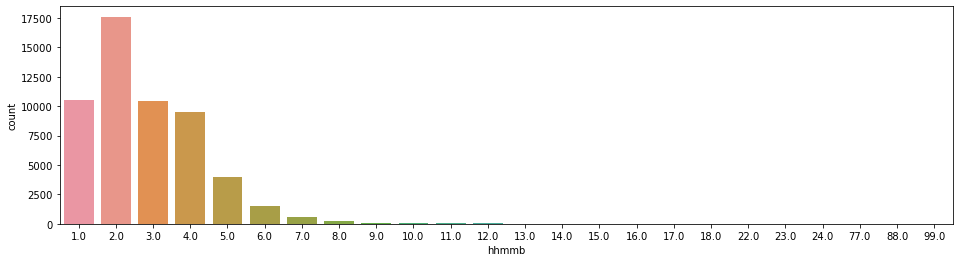

icpart1
Percentage of null: 0.0


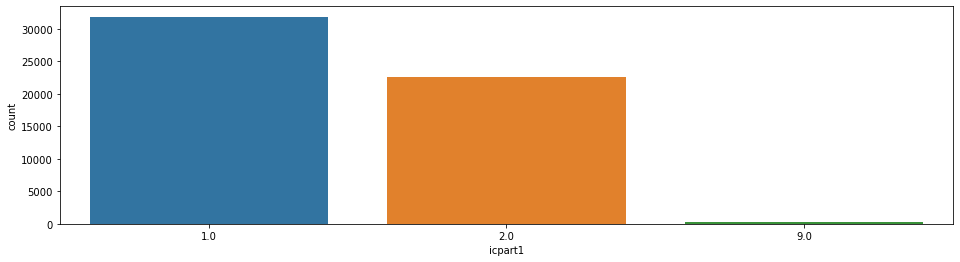

rshipa2
Percentage of null: 0.0


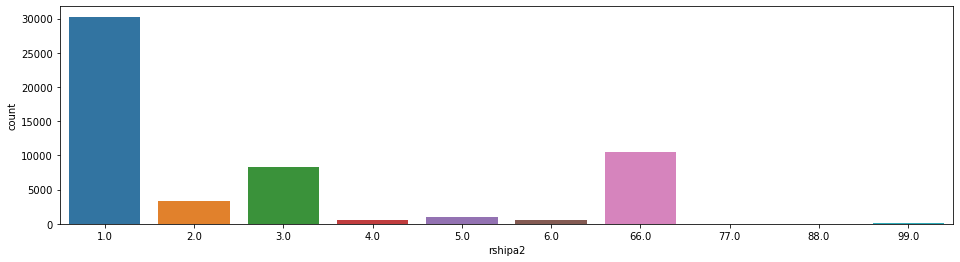

marsts
Percentage of null: 0.0


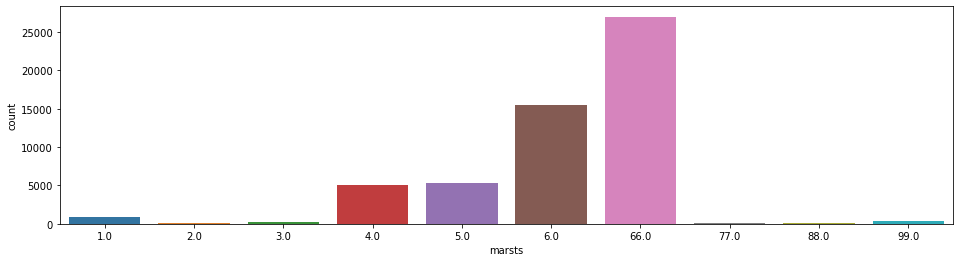

chldhm
Percentage of null: 0.0


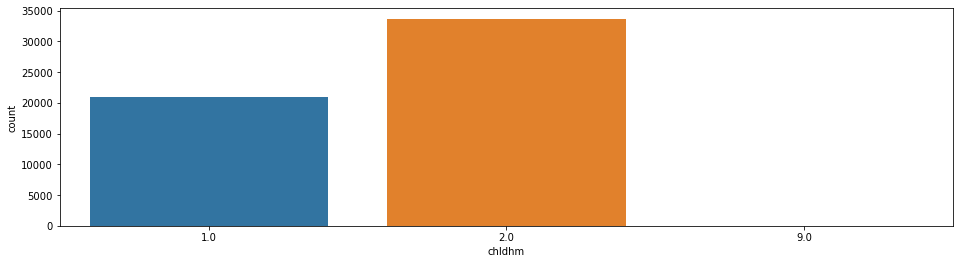

domicil
Percentage of null: 0.0


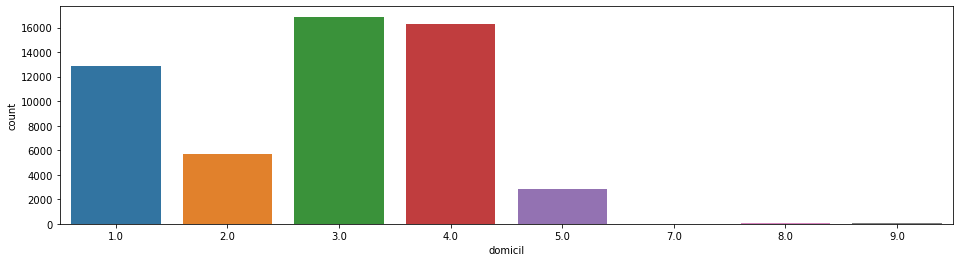

edulvlb
Percentage of null: 0.0


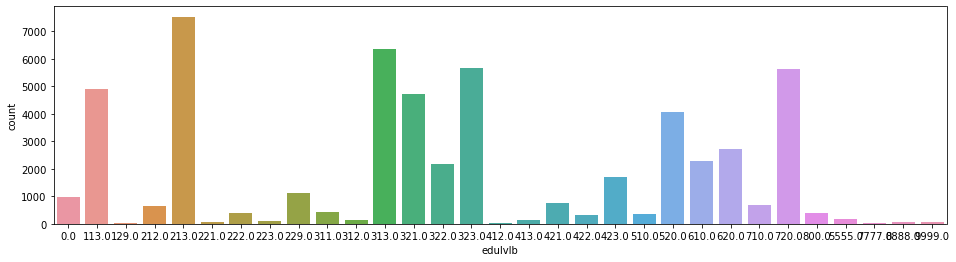

eduyrs
Percentage of null: 0.0


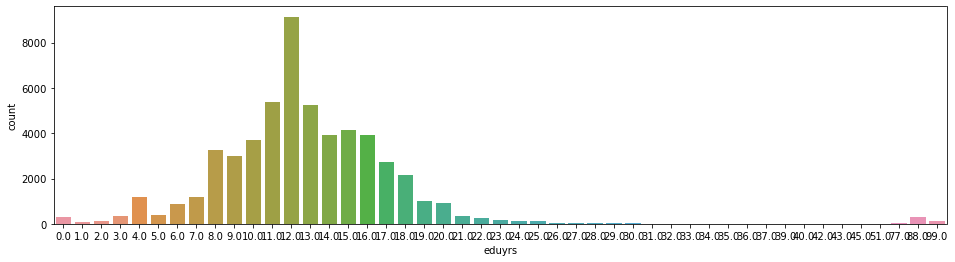

In [124]:
for col in cat_cols:
    print(col)
    basic_eda(df, col)
    print('='*80)

agea
Percentage of null: 0.0


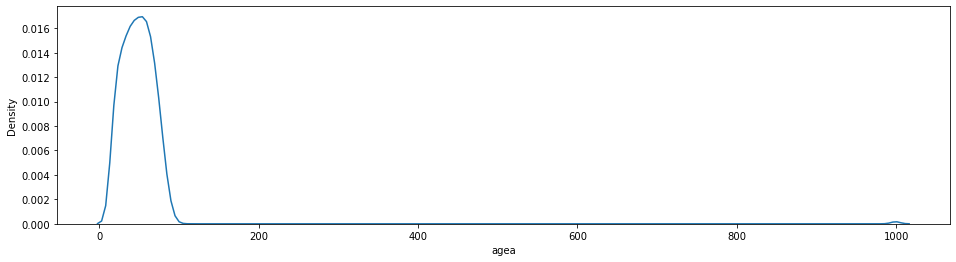

In [127]:
for col in num_cols:
    print(col)
    basic_eda(df, col, categorical=False)
    print('='*80)

Percentage of null: 0.0


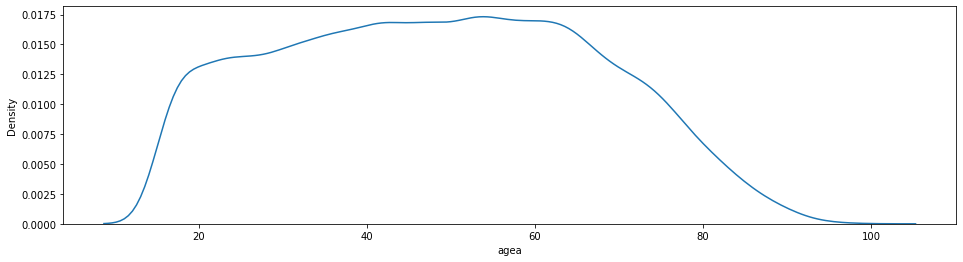

In [128]:
basic_eda(df[df['agea']<100], 'agea', categorical=False)

## How well-being differs based on countries?

- **happy**: How happy are you
- **sclmeet**: How often socially meet with friends, relatives or colleagues
- **inprdsc**: How many people with whom you can discuss intimate and personal matters
- **sclact**: Take part in social activities compared to others of same age
- **crmvct**: Respondent or household member victim of burglary/assault last 5 years
- **aesfdrk**: Feeling of safety of walking alone in local area after dark
- **health**: Subjective general health
- **hlthhmp**: Hampered in daily activities by illness/disability/infirmity/mental problem

In [110]:
cols = ['cntry', 'happy', 'sclmeet', 'inprdsc', 'sclact', 'crmvct', 'aesfdrk', 'health', 'hlthhmp']

In [112]:
df_wb = df[cols].copy()

In [114]:
df_wb.head()

,cntry,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp
0,Albania,8,Once a week,3,About the same,Less than most,Very safe,Fair,No
1,Albania,Extremely unhappy,Once a month,1,Less than most,Less than most,Unsafe,Good,No
2,Albania,5,Every day,10 or more,About the same,Much less than most,Unsafe,Very good,No
3,Albania,4,Several times a week,2,About the same,Less than most,Very safe,Fair,No
4,Albania,7,Several times a month,None,Less than most,Less than most,Safe,Fair,No


## TODO - EFA for some variables

https://medium.com/datarisk-io/entenda-como-a-an%C3%A1lise-fatorial-pode-ajudar-em-um-melhor-entendimento-dos-dados-88c53285865c